## House Price Prediction using Linear Regression: Part 2


## Introduction of project
Goal: My goal for this project is to use the square foot and price of houses to predict the price of others houses when given the sqft. 

Part 2: In order to slightly progress my understanding of linear regression I will use 20 sets of data of house prices and sqft. I will divide the data up into a training and test sets. I will use the scikit learn library to find the line of best fit and then use the test set data to provide an accuracy score of this model. I will then use this model to predict a house price when given the sqft of the house. 

Step 1: Create and format data<br>
Step 2: Calculate the equation of the line of best fit between the two points using scikit learn.<br>
Step 3: Plot the line<br>
Step 4: Test model on test set data to provide an accuracy score<br>
Step 5: Use model to make prediction

### Step 1: Create and format data

### 1.1: Create  and format data

In [121]:
import numpy as np
import matplotlib.pyplot as plt

In [122]:
# create a numpy array of random numbers between 0.5 and 3 to represent sqft of houses and the same for price. 
# Then sort them so there is a positive correlation. 
size_in_sqft_arr = np.random.uniform(0.5, 3, 20)
size_in_sqft_training_data = np.sort(size_in_sqft_arr)
price_in_pounds_arr = np.random.uniform(200, 700, 20)
price_in_pounds_target_data = np.sort(price_in_pounds_arr)

### 1.2: Split into test and training sets

In [123]:
# Use scikit learn to split the data into training and test sets with 90% of the data in the training set and 10% in the test set.

In [124]:
import sklearn
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.utils import shuffle

size_in_sqft_training_set, size_in_sqft_test_set, price_in_pounds_training_set, price_in_pounds_test_set = sklearn.model_selection.train_test_split(
    size_in_sqft_training_data, price_in_pounds_target_data, test_size=0.1)

### 1.3: Inital plot of data

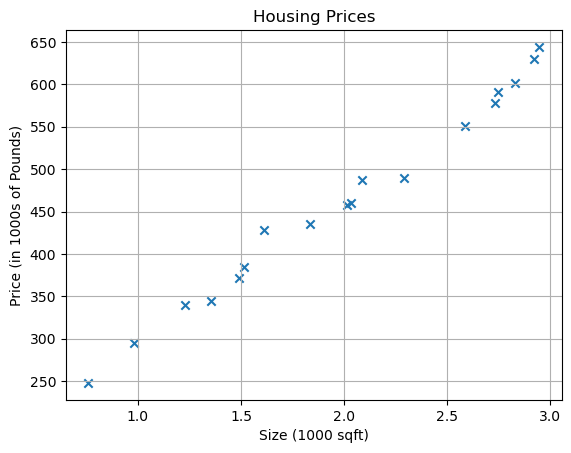

In [125]:
plt.scatter(size_in_sqft_training_set, price_in_pounds_training_set, marker='x')
plt.title("Housing Prices")
plt.ylabel('Price (in 1000s of Pounds)')
plt.xlabel('Size (1000 sqft)')
plt.grid(True)
plt.show()

### Step 2: Calculate the equation of the line of best fit between the two points using scikit learn

In [132]:
# ensure arrays are in the correct shape - model.fit([[n_samples][n_features]], [n_samples])
# As this training set only has one feature the structure of the above should look something like:
# model.fit([[1.126],[1.58],[1.64]], [296, 373, 564])

size_in_sqft_training_set = size_in_sqft_training_set.reshape(-1, 1)
model = linear_model.LinearRegression()
model.fit(size_in_sqft_training_set, price_in_pounds_training_set)

b, m = round(model.intercept_, 2), round(model.coef_[0], 2)

print(f"Line of equation is: y = {m}(x) + {b}")

Line of equation is: y = 169.38(x) + 124.77


### Step 3: Plot the line

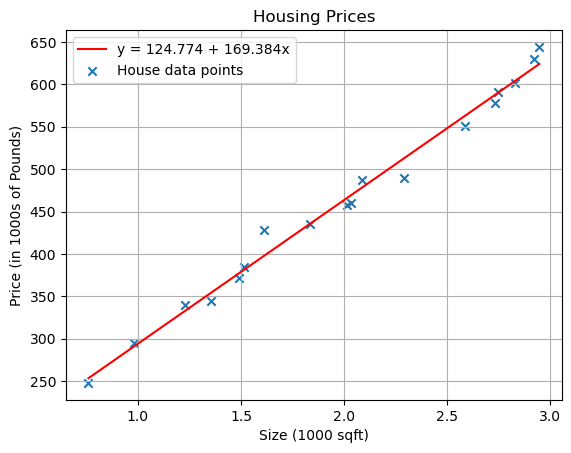

In [127]:
x_values = np.linspace(min(size_in_sqft_training_set), max(size_in_sqft_training_set), 100).reshape(-1, 1)
y_values = b + m * x_values
plt.plot(x_values, y_values, color='red', label=f'y = {b} + {m}x')
plt.scatter(size_in_sqft_training_set, price_in_pounds_training_set, marker='x', label=f'House data points')
plt.title("Housing Prices")
plt.ylabel('Price (in 1000s of Pounds)')
plt.xlabel('Size (1000 sqft)')
plt.legend()
plt.grid(True)
plt.show()

### Step 4: Test model on test set data to provide an accuracy score

In [128]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
# Predict the test set
y_pred = model.predict(size_in_sqft_training_set)

# Calculate metrics
r2 = r2_score(price_in_pounds_training_set, y_pred)
mae = mean_absolute_error(price_in_pounds_training_set, y_pred)
mse = mean_squared_error(price_in_pounds_training_set, y_pred)
rmse = np.sqrt(mse)

# Print the metrics
print(f"R² Score: {r2}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")

R² Score: 0.9884638912114849
Mean Absolute Error (MAE): 9.526158857480944
Mean Squared Error (MSE): 153.05286869177593
Root Mean Squared Error (RMSE): 12.37145378246938


### Step 5: Use model to make a prediction

The goal of this project was to be able to predict the house price of a house with a given sqft. <br>
The sqft can be edited below to return the predicted house price and will be marked in green on the plot below. 

In [129]:
sqft = 1.75
predicted_price = (m * sqft) + b
print(f"The predicted value of a house with {round(sqft) * 1000} square feet is £{round(predicted_price) * 1000}")

The predicted value of a house with 2000 square feet is £421000


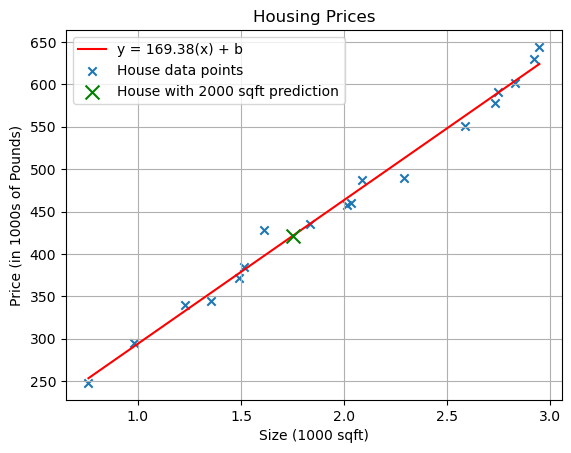

In [133]:
x_values, y_values = np.linspace(min(size_in_sqft_training_set), max(size_in_sqft_training_set), 100).reshape(-1, 1), m * x_values + b
plt.plot(x_values, y_values, color='red', label=f'y = {m}(x) + b')
plt.scatter(size_in_sqft_training_set, price_in_pounds_training_set, marker='x', label=f'House data points')
plt.scatter(sqft, predicted_price, color='green', label=f'House with {round(sqft) * 1000} sqft prediction', zorder=5, marker='x', s=100)
plt.title("Housing Prices")
plt.ylabel('Price (in 1000s of Pounds)')
plt.xlabel('Size (1000 sqft)')
plt.legend()
plt.grid(True)
plt.show()

## Conclusion

Adding more data definitely helps with confidence in the algorithms as it is more likely to spot the overall trend and less likely to draw a incorrect corelation. 

Just using the sqft and house price is great first start at using data for predictions. Inevitably though, in the real world house prices are much more complex than just knowing the square feet of a house and being able to acurately predict the price of the house. In order to make better estimates we would need more data and more input variables such as bedrooms, bathrooms and location. 

This two variable linear regression approach was a great first start into understanding how powerful Machine Learning algorithms can be but it is still a long way from being useful in being applied to the real world. 

In part 3 of this project I will use a greater number of input variables in order to make more accurate predictions. 